<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/ZiyueNie/FM

Cloning into 'FM'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 115 (delta 16), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (115/115), 644.78 KiB | 3.22 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [5]:
cd FM/data

/content/FM/data/FM/data


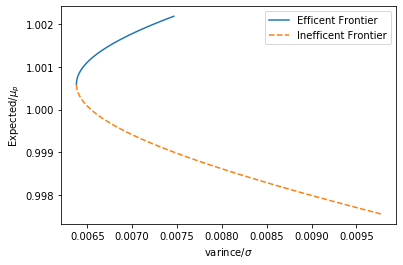

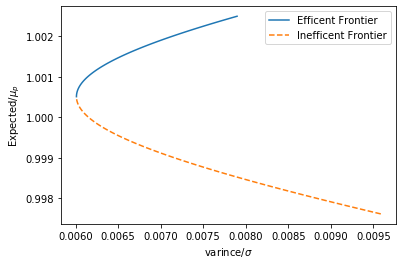

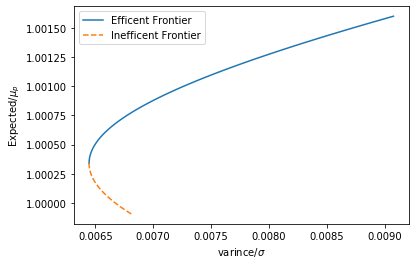

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

mu_m=0
mu=np.zeros(20)
names=['AAPL','AMZN','APD','BMW.DE','C','DOV','FB','GOOGL','GS','JNJ','JPM','KO','MCD','MS','MSFT','NMR','SBUX','TSLA','TWTR','V']


def getData(n=None):
    Is=[i for i in range(20)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[0] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega=np.cov(np.array(Rows))
    return Omega
        
def optimalPortfolio(mu,Omega,mu_p):
    one=np.ones(20).T
    A=np.dot(one,np.dot(np.linalg.inv(Omega),mu))
    B=np.dot(mu,np.dot(np.linalg.inv(Omega),mu))
    C=np.dot(one,np.dot(np.linalg.inv(Omega),one))
    D=B*C-A**2
    g=(B/D)*np.dot(np.linalg.inv(Omega),one)-(A/D)*np.dot(np.linalg.inv(Omega),mu)
    h=(C/D)*np.dot(np.linalg.inv(Omega),mu)-(A/D)*np.dot(np.linalg.inv(Omega),one)
    mu_m=-(np.dot(g.T,np.dot(Omega,h)))/(np.dot(h.T,np.dot(Omega,h)))
    return g+mu_p*h

def setting(Omega):
    one=np.ones(20).T
    A=np.dot(one,np.dot(np.linalg.inv(Omega),mu))
    B=np.dot(mu,np.dot(np.linalg.inv(Omega),mu))
    C=np.dot(one,np.dot(np.linalg.inv(Omega),one))
    D=B*C-A**2
    g=(B/D)*np.dot(np.linalg.inv(Omega),one)-(A/D)*np.dot(np.linalg.inv(Omega),mu)
    h=(C/D)*np.dot(np.linalg.inv(Omega),mu)-(A/D)*np.dot(np.linalg.inv(Omega),one)
    mu_m=-(np.dot(g.T,np.dot(Omega,h)))/(np.dot(h.T,np.dot(Omega,h)))
    return mu_m
    
def draw(mu_m,mu):
    mu_ps=np.linspace(mu_m,max(mu),100)
    sigmas=[]
    mu_ps1=np.linspace(min(mu),mu_m,100)
    for mu_p in mu_ps:
        w=optimalPortfolio(mu,Omega,mu_p)
        sigmas.append(math.sqrt(np.dot(w,np.dot(Omega,w))))
    plt.plot(sigmas,mu_ps,label='Efficent Frontier')
    plt.xlabel("varince/$\sigma$")
    plt.ylabel("Expected/$\mu_p$")
    sigmas=[]
    for mu_p in mu_ps1:
        w=optimalPortfolio(mu,Omega,mu_p)
        sigmas.append(math.sqrt(np.dot(w,np.dot(Omega,w))))
    plt.plot(sigmas,mu_ps1,'--',label='Inefficent Frontier')
    plt.legend()
    plt.show()
    
ns=[100,160,None]
mini_vs=[]
for n in ns:
    Omega= getData(n)
    mu_m=setting(Omega)
    mini_vs.append(optimalPortfolio(mu,Omega,mu_m))
    draw(mu_m,mu)   
